# Importing Libraries

In [1]:
import os                   
import cv2  
import h5py
from tqdm import tqdm
import random as rn
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# % matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier
from sklearn import metrics

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import load_model

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
# from keras.applications.resnet50 import ResNet50

In [4]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Importing increased data augumentation file


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
array_128x128_final = np.load("/content/drive/MyDrive/Colab Notebooks/Car_damage_aug_dataset_final.npz", allow_pickle=True)


# Train-Test-Split 

In [7]:
X_train = array_128x128_final['X_train']
y_train = array_128x128_final['y_train']

In [8]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

X_train shape: (12640, 128, 128, 3)
y_train shape: (12640,)


In [9]:
X_test = array_128x128_final['X_test']
y_test = array_128x128_final['y_test']

In [10]:
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_test shape: (5418, 128, 128, 3)
y_test shape: (5418,)


# Verifying image, plotting single image from numpy data

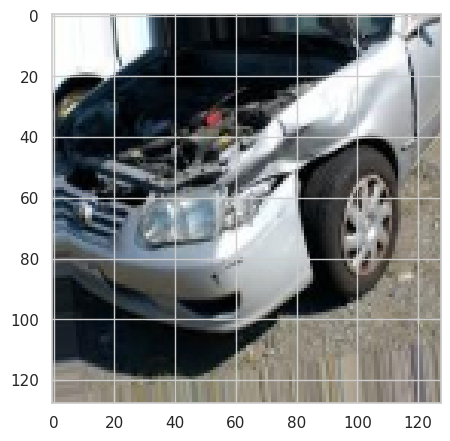

In [11]:
plt.plot(121)
img = np.reshape(X_train[1], (128,128,3))
plt.imshow(img)

# Running previous best performing model: decrease architecture complexity and dropout

In [12]:
NUM_EPOCHS = 100
keep_prob = 0.5
model_rate = 1-keep_prob
vggModel= tf.keras.applications.VGG16( weights='imagenet', include_top=False, input_shape=(128, 128, 3))

vggModel.trainable= False

model = tf.keras.models.Sequential()
model.add(vggModel)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=model_rate))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 16,812,867
Trainable params: 2,098,179
Non-trainable params: 14,714,688
_________________________________________________________________
None


##### Saving the model during training 


In [13]:
save_at = "/content/drive/MyDrive/Colab Notebooks/model.hdf5"
save_best = ModelCheckpoint (save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])

#  = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=32, validation_data=(X_test, y_test))
H = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=32, validation_data=(X_test, y_test), callbacks=[save_best])


Epoch 1/100
395/395 [==============================] - 34s 72ms/step - loss: 5.9721 - accuracy: 0.4094 - val_loss: 0.9848 - val_accuracy: 0.4788
Epoch 2/100
395/395 [==============================] - 26s 67ms/step - loss: 1.0009 - accuracy: 0.4903 - val_loss: 0.9297 - val_accuracy: 0.5445
Epoch 3/100
395/395 [==============================] - 25s 64ms/step - loss: 1.0044 - accuracy: 0.5089 - val_loss: 0.8772 - val_accuracy: 0.5949
Epoch 4/100
395/395 [==============================] - 25s 64ms/step - loss: 0.9279 - accuracy: 0.5398 - val_loss: 0.9034 - val_accuracy: 0.6045
Epoch 5/100
395/395 [==============================] - 27s 69ms/step - loss: 0.9013 - accuracy: 0.5612 - val_loss: 0.8998 - val_accuracy: 0.5775
Epoch 6/100
395/395 [==============================] - 25s 64ms/step - loss: 0.8478 - accuracy: 0.5818 - val_loss: 0.8245 - val_accuracy: 0.6294
Epoch 7/100
395/395 [==============================] - 27s 69ms/step - loss: 0.8651 - accuracy: 0.6017 - val_loss: 0.8661 - val_ac

# Running model on Test Set

In [15]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/model.hdf5')
score = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

Accuracy over the test set: 
  81.27 %


In [16]:
y_test

array([1, 2, 0, ..., 1, 0, 0])

In [17]:
encoder = LabelEncoder()
Targets = encoder.fit_transform(y_test)
Targets
Targets.shape

(5418,)

In [ ]:
Y_pred = np.round(model.predict(X_test))

np.random.seed(87)
for rand_num in np.random.randint(0, len(y_test), 10):
  plt.figure()
  plt.imshow(X_test[rand_num]), plt.axis('off')
  if np.where(Y_pred[rand_num] == 1)[0].sum() == np.where(y_test[rand_num] == 1)[0].sum():
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='g')
  else :
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='r')

169/170 [============================>.] - ETA: 0s

# Plotting Training/Validation Accuracy and Loss

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=4)

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Trying other parameters

In [ ]:
from keras import regularizers, layers
from keras.callbacks import EarlyStopping


NUM_EPOCHS = 100
keep_prob = 0.5
model_rate = 1-keep_prob
vggModel= tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

vggModel.trainable= False

model2 = tf.keras.models.Sequential()
model2.add(vggModel)
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(rate=model_rate))
model2.add(tf.keras.layers.Dense(3, activation='softmax'))
# model2.add(tf.keras.layers.Dense(5, activation='softmax'))

print (model2.summary())

In [ ]:
save_at = "/content/drive/MyDrive/Colab Notebooks/model2.hdf5"
save_best = ModelCheckpoint(save_at, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='max')

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])
# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# #patience early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
H2 = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=32, validation_data=(X_test, y_test), callbacks=[es, save_best])


In [ ]:
model2 = load_model('/content/drive/MyDrive/Colab Notebooks/model2.hdf5')

# evaluate the model
_, train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, test_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()